<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220710.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor
* customer analysis

In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotnine as gg 
from plotnine import ggplot, aes 
import os
from datetime import datetime, date, time, timezone, timedelta

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA 
from sklearn.impute import KNNImputer 
from sklearn.cluster import KMeans 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error, f1_score, accuracy_score
import sklearn.datasets as skd

# regressor

In [4]:
raw = skd.fetch_california_housing()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = pd.DataFrame(raw['target'])

x.columns = [a.lower() for a in x.columns]
x.head()

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


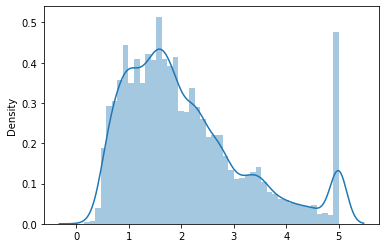

In [7]:
sns.distplot(y)

In [32]:
y_ = pd.DataFrame(np.array(y).reshape(-1,1), columns = ['target'])
y_ = y_.assign(gr = pd.qcut(y_['target'].rank(method = 'first'), 10, range(1,11)))
y_.head()

,target,gr
0,4.526,10
1,3.585,9
2,3.521,9
3,3.413,9
4,3.422,9


In [33]:
test = pd.DataFrame(np.c_[x.values, y_.values], columns = list(x.columns) + list(y_.columns))
test.head()

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,target,gr
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,10.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,9.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,9.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,9.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,9.0


In [36]:
test.groupby(['gr']).agg('mean').reset_index()

,gr,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,target
0,1.0,2.119234,29.189922,5.101863,1.148930,1179.493217,3.397553,36.911560,-119.874409,0.646994
1,2.0,2.575411,27.950097,5.263370,1.141581,1286.249516,3.045485,36.327243,-119.683324,0.945163
2,3.0,2.968136,26.909399,5.268372,1.122614,1504.963663,3.103451,35.857476,-119.445523,1.201188
3,4.0,3.227571,26.969477,5.155507,1.105247,1592.692345,3.843990,35.432689,-119.261618,1.455613
4,5.0,3.504498,27.801357,5.190844,1.102615,1564.301357,3.260745,35.122800,-119.137437,1.676126
5,6.0,3.774577,28.133721,5.212617,1.080024,1509.420543,2.951825,35.131424,-119.276114,1.928571
6,7.0,4.133023,28.579942,5.316300,1.065818,1516.654554,2.954107,35.222960,-119.471037,2.253875
7,8.0,4.561320,28.398256,5.522425,1.053982,1508.009205,2.738369,35.508595,-119.872350,2.647494
8,9.0,5.092049,29.676357,5.822904,1.060243,1395.864826,2.871964,35.462534,-119.874390,3.313809
9,10.0,6.750890,32.786337,6.435795,1.085697,1197.118217,2.539063,35.341332,-119.800843,4.616748


In [37]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [52]:
fit_lm = LinearRegression().fit(x_tr, y_tr)
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
pred_lm = fit_lm.predict(x_te)
pred_rf = fit_rf.predict(x_te)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [53]:
mean_squared_error(y_te, pred_lm), mean_squared_error(y_te, pred_rf)

(0.5345732878374656, 0.2596905044439371)

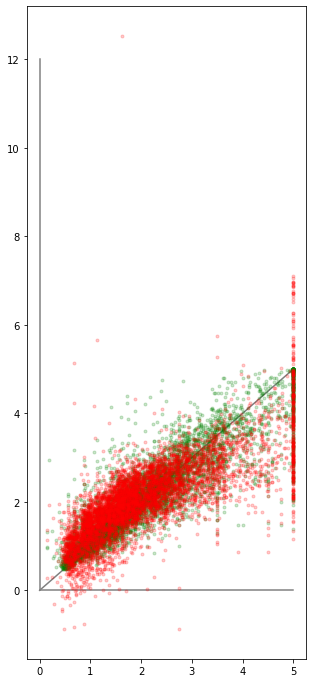

In [58]:
plt.figure(figsize = [5,12])
plt.plot([0, 5], [0, 5], color = 'grey')
plt.plot([0, 5], [0, 0], color = 'grey')
plt.plot([0, 0], [0, 12], color = 'grey')
plt.plot(y_te.values, pred_rf, '.', color = 'green', alpha =.2)
plt.plot(y_te.values, pred_lm, '.', color = 'red', alpha =.2)


# customer analysis

In [60]:
os.listdir()

['.config',
 'retail_data_response.csv',
 'retail_data_transactions.csv',
 '.Rhistory',
 'shops.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales_train.csv',
 'items.csv',
 'online_retail_II.xlsx',
 'ecommerce-data.csv',
 'sample_submission.csv',
 'listings.csv',
 'item_categories.csv',
 'rfm_test.csv',
 'test.csv',
 'sample_data']

In [62]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions')
df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [63]:
df.columns = df.iloc[0]
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [66]:
df = df.drop([0], axis = 0)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [68]:
df = df[df['order_status'] == 'Approved']
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [69]:
df['date'] = df['transaction_date'].to_numpy().astype('datetime64[D]')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,2017-02-25
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,2017-05-21
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,2017-10-16
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145,2017-08-31
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226,2017-10-01


In [72]:
df = df[['customer_id', 'date', 'standard_cost']].rename(columns = {'customer_id':'id','standard_cost':'rev'})
df.head()

,id,date,rev
1,2950,2017-02-25,53.62
2,3120,2017-05-21,388.92
3,402,2017-10-16,248.82
4,3135,2017-08-31,381.1
5,787,2017-10-01,709.48


In [73]:
df['month'] = df['date'].to_numpy().astype('datetime64[M]')
df.head()

,id,date,rev,month
1,2950,2017-02-25,53.62,2017-02-01
2,3120,2017-05-21,388.92,2017-05-01
3,402,2017-10-16,248.82,2017-10-01
4,3135,2017-08-31,381.1,2017-08-01
5,787,2017-10-01,709.48,2017-10-01


In [75]:
df = df.groupby(['id', 'month', 'date'])['rev'].sum().reset_index()
df.head()

,id,month,date,rev
0,1,2017-01-01,2017-01-05,270.3
1,1,2017-02-01,2017-02-21,53.62
2,1,2017-03-01,2017-03-27,612.88
3,1,2017-03-01,2017-03-29,764.96
4,1,2017-04-01,2017-04-06,826.51


In [83]:
info_m = df.groupby(['id', 'month'])['rev'].sum().reset_index().rename(columns = {'rev':'money'})
info_m = pd.pivot_table(info_m, index = 'id', columns = 'month', values = 'money').reset_index()
info_m = pd.melt(info_m, id_vars = 'id', var_name = 'month', value_name = 'money').sort_values(['id', 'month'], ascending = [1,0])
info_m = info_m.groupby(['id']).head(3)
info_m = info_m.groupby(['id'])['money'].sum().reset_index()
info_m.head()


,id,money
0,1,965.65
1,2,0.00
2,3,0.00
3,4,0.00
4,5,582.48


In [84]:
info_f = df.groupby(['id', 'month'])['rev'].count().reset_index().rename(columns = {'rev':'freq'})
info_f = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'freq').reset_index()
info_f = pd.melt(info_f, id_vars = 'id', var_name = 'month', value_name = 'freq').sort_values(['id', 'month'], ascending = [1,0])
info_f = info_f.groupby(['id']).head(3)
info_f = info_f.groupby(['id'])['freq'].sum().reset_index()
info_f.head()


,id,freq
0,1,3.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,1.0


In [85]:
df['date'].max()

Timestamp('2017-12-30 00:00:00')

In [86]:
date_now = datetime(2017, 12, 31)

In [87]:
info_r = df.groupby(['id']).agg({'date': lambda x : (date_now - x.max()).days}).reset_index().rename(columns = {'date':'recency'})
info_r.head()

,id,recency
0,1,8
1,2,129
2,3,103
3,4,196
4,5,17


In [88]:
info = pd.merge(pd.merge(info_r, info_f, 'left', 'id'), info_m, 'left', 'id')
info.head()

,id,recency,freq,money
0,1,8,3.0,965.65
1,2,129,0.0,0.00
2,3,103,0.0,0.00
3,4,196,0.0,0.00
4,5,17,1.0,582.48


In [90]:
info = info.assign(r = pd.qcut(info['recency'], 5, list('54321')),
            f = pd.qcut(info['freq'].rank(method = 'first'), 5, list('12345')),
            m = pd.qcut(info['money'].rank(method = 'first'), 5, list('12345'))
            )
info.head()

,id,recency,freq,money,r,f,m
0,1,8,3.0,965.65,5,5,4
1,2,129,0.0,0.00,1,1,1
2,3,103,0.0,0.00,1,1,1
3,4,196,0.0,0.00,1,1,1
4,5,17,1.0,582.48,4,2,3


In [91]:
info.assign(rf = info['r'].astype(str) + info['m'].astype(str))

,id,recency,freq,money,r,f,m,rf
0,1,8,3.0,965.650000,5,5,4,54
1,2,129,0.0,0.000000,1,1,1,11
2,3,103,0.0,0.000000,1,1,1,11
3,4,196,0.0,0.000000,1,1,1,11
4,5,17,1.0,582.480000,4,2,3,43
...,...,...,...,...,...,...,...,...
3488,3497,53,1.0,954.820000,3,3,4,34
3489,3498,128,0.0,0.000000,1,2,2,12
3490,3499,52,1.0,376.840000,3,3,2,32
3491,3500,145,0.0,0.000000,1,2,2,12
